# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

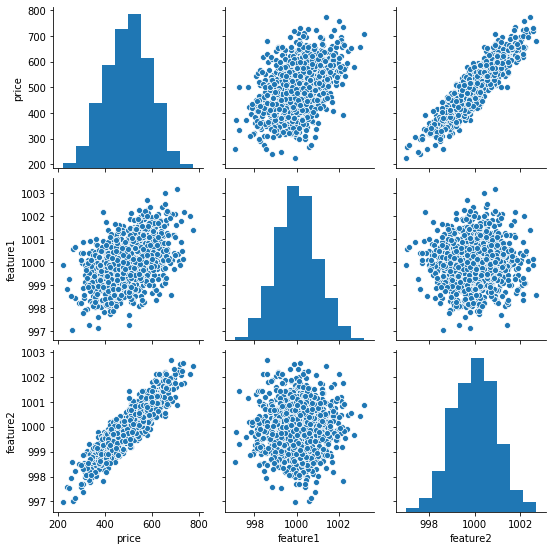

In [7]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [15]:
y_train.shape

(700,)

In [16]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [19]:
scaler = MinMaxScaler()

In [20]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [21]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [27]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [28]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [34]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse', metrics=["acc"])

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [35]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 4ms/step - loss: 256222.5781 - acc: 0.0000e+00
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 255917.1875 - acc: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 255542.1250 - acc: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 255050.7188 - acc: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 254466.9219 - acc: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 253796.9219 - acc: 0.0000e+00
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 253023.5156 - acc: 0.0000e+00
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 252145.3750 - acc: 0.0000e+00
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 251159.9062 - acc: 0.0000e+00
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss:

22/22 [==============================] - 0s 4ms/step - loss: 1383.3961 - acc: 0.0000e+00
Epoch 81/250
22/22 [==============================] - 0s 4ms/step - loss: 1342.1494 - acc: 0.0000e+00
Epoch 82/250
22/22 [==============================] - 0s 4ms/step - loss: 1301.8293 - acc: 0.0000e+00
Epoch 83/250
22/22 [==============================] - 0s 4ms/step - loss: 1260.2242 - acc: 0.0000e+00
Epoch 84/250
22/22 [==============================] - 0s 4ms/step - loss: 1219.5796 - acc: 0.0000e+00
Epoch 85/250
22/22 [==============================] - 0s 4ms/step - loss: 1178.9830 - acc: 0.0000e+00
Epoch 86/250
22/22 [==============================] - 0s 5ms/step - loss: 1138.9756 - acc: 0.0000e+00
Epoch 87/250
22/22 [==============================] - 0s 4ms/step - loss: 1105.6238 - acc: 0.0000e+00
Epoch 88/250
22/22 [==============================] - 0s 3ms/step - loss: 1062.6820 - acc: 0.0000e+00
Epoch 89/250
22/22 [==============================] - 0s 4ms/step - loss: 1024.6019 - acc: 0.00

22/22 [==============================] - 0s 4ms/step - loss: 24.7494 - acc: 0.0000e+00
Epoch 161/250
22/22 [==============================] - 0s 4ms/step - loss: 24.8124 - acc: 0.0000e+00
Epoch 162/250
22/22 [==============================] - 0s 4ms/step - loss: 24.1032 - acc: 0.0000e+00
Epoch 163/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7329 - acc: 0.0000e+00
Epoch 164/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4381 - acc: 0.0000e+00
Epoch 165/250
22/22 [==============================] - 0s 4ms/step - loss: 24.7410 - acc: 0.0000e+00
Epoch 166/250
22/22 [==============================] - 0s 4ms/step - loss: 24.2191 - acc: 0.0000e+00
Epoch 167/250
22/22 [==============================] - 0s 3ms/step - loss: 24.6169 - acc: 0.0000e+00
Epoch 168/250
22/22 [==============================] - 0s 3ms/step - loss: 24.6979 - acc: 0.0000e+00
Epoch 169/250
22/22 [==============================] - 0s 3ms/step - loss: 24.3500 - acc: 0.0000e+00
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 24.5121 - acc: 0.0000e+00
Epoch 242/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4003 - acc: 0.0000e+00
Epoch 243/250
22/22 [==============================] - 0s 4ms/step - loss: 24.4689 - acc: 0.0000e+00
Epoch 244/250
22/22 [==============================] - 0s 3ms/step - loss: 24.2928 - acc: 0.0000e+00
Epoch 245/250
22/22 [==============================] - 0s 4ms/step - loss: 24.6024 - acc: 0.0000e+00
Epoch 246/250
22/22 [==============================] - 0s 4ms/step - loss: 24.4577 - acc: 0.0000e+00
Epoch 247/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5536 - acc: 0.0000e+00
Epoch 248/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4177 - acc: 0.0000e+00
Epoch 249/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5554 - acc: 0.0000e+00
Epoch 250/250
22/22 [==============================] - 0s 3ms/step - loss: 24.0685 - acc: 0.0000e+00


## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [36]:
model.history.history

{'loss': [256222.578125,
  255917.1875,
  255542.125,
  255050.71875,
  254466.921875,
  253796.921875,
  253023.515625,
  252145.375,
  251159.90625,
  250046.828125,
  248804.828125,
  247423.5625,
  245897.03125,
  244217.578125,
  242372.15625,
  240357.84375,
  238158.21875,
  235781.296875,
  233207.421875,
  230437.53125,
  227450.703125,
  224248.484375,
  220822.46875,
  217172.640625,
  213285.71875,
  209161.34375,
  204804.234375,
  200192.78125,
  195344.046875,
  190260.5625,
  184904.953125,
  179309.921875,
  173490.984375,
  167419.640625,
  161131.890625,
  154674.171875,
  147957.71875,
  141030.828125,
  133918.90625,
  126642.15625,
  119252.03125,
  111744.671875,
  104145.6796875,
  96473.5234375,
  88718.09375,
  81010.7734375,
  73331.09375,
  65766.375,
  58337.09765625,
  51101.28515625,
  44070.17578125,
  37370.1953125,
  31041.673828125,
  25199.81640625,
  19833.60546875,
  15055.392578125,
  10986.666015625,
  7636.2529296875,
  5082.16162109375,
  3390.

In [42]:
model.history.history["acc"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [43]:
loss = model.history.history['loss']

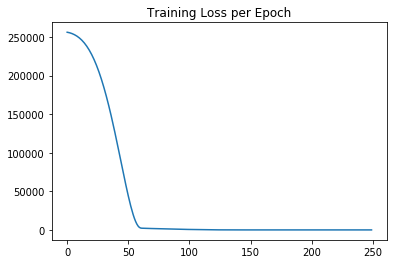

In [44]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [45]:
model.metrics_names

['loss', 'acc']

In [46]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [47]:
training_score

[23.72928810119629, 0.0]

In [48]:
test_score

[25.172304153442383, 0.0]

### Further Evaluations

In [49]:
test_predictions = model.predict(X_test)

In [50]:
test_predictions

array([[405.54715],
       [624.0218 ],
       [592.5834 ],
       [572.6517 ],
       [366.8266 ],
       [579.6148 ],
       [515.41583],
       [459.42352],
       [549.64716],
       [447.8244 ],
       [612.2562 ],
       [549.3587 ],
       [419.37103],
       [409.1292 ],
       [651.7607 ],
       [437.59192],
       [508.8224 ],
       [660.4451 ],
       [663.10345],
       [565.9632 ],
       [334.40808],
       [445.1317 ],
       [382.7577 ],
       [378.98553],
       [567.0185 ],
       [611.05743],
       [532.77826],
       [428.14185],
       [655.95526],
       [414.35114],
       [442.93524],
       [485.4679 ],
       [438.7067 ],
       [682.3876 ],
       [425.04047],
       [417.95346],
       [502.29276],
       [550.88336],
       [510.09308],
       [395.59747],
       [619.0704 ],
       [416.89996],
       [604.91376],
       [446.26495],
       [502.34637],
       [582.1637 ],
       [669.5367 ],
       [490.75128],
       [318.75073],
       [485.7669 ],


In [51]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [52]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [53]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [54]:
test_predictions

0      405.547150
1      624.021790
2      592.583374
3      572.651672
4      366.826599
          ...    
295    529.426514
296    515.690002
297    610.120422
298    417.227966
299    411.136108
Length: 300, dtype: float32

In [55]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [56]:
pred_df.columns = ['Test Y','Model Predictions']

In [57]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.547150
1,624.156198,624.021790
2,582.455066,592.583374
3,578.588606,572.651672
4,371.224104,366.826599
...,...,...
295,525.704657,529.426514
296,502.909473,515.690002
297,612.727910,610.120422
298,417.569725,417.227966


Let's compare to the real test labels!

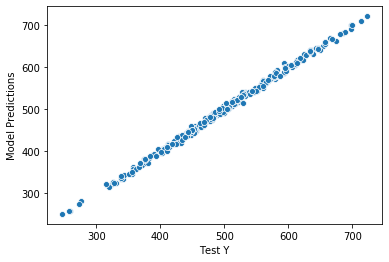

In [58]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [59]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

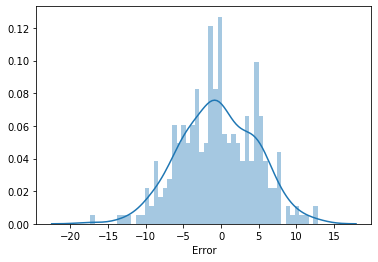

In [60]:
sns.distplot(pred_df['Error'],bins=50)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.026492724373283

In [63]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.172309756683404

In [67]:
# Essentially the same thing, difference just due to precision
test_score

[25.172304153442383, 0.0]

In [69]:
#RMSE
test_score[0]**0.5

5.01720082849415

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [70]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [71]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [72]:
new_gem = scaler.transform(new_gem)

In [73]:
model.predict(new_gem)

array([[419.9519]], dtype=float32)

## Saving and Loading a Model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [76]:
later_model = load_model('my_model.h5')

In [77]:
later_model.predict(new_gem)

array([[419.9519]], dtype=float32)